In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
from sklearn.preprocessing import RobustScaler #robust normlization for outliers
import sklearn.metrics as metrics #metrics librry
import seaborn as sns # for intractve graphs
import matplotlib.pyplot as plt #for visualization
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
dataframe = pd.read_csv('creditcard.csv')

In [82]:
dataframe.shape


(284807, 31)

In [83]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
dataframe.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [85]:
dataframe.info()
#V1-V28 suggests Principal Components of data
#Time is relative to the first data point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [86]:
print(dataframe['Time'].describe())
hrs = dataframe.Time.max()/(60*60)
print()
print("Total time for the dataset = " + str(hrs))
#48hrs mean 2 days worth of credit card data

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Total time for the dataset = 47.99777777777778


In [87]:
dataframe['Class'].value_counts()
#Highly unbalanced Dataset

0    284315
1       492
Name: Class, dtype: int64

In [88]:
per = (492/284315)*100
print("%.2f" % round(per,2) + "% of fraud transactions out of total")
per2 = ((284315-492)/284315)*100
print("%.2f" % round(per2,2) + "% of normal transactions out of total")

0.17% of fraud transactions out of total
99.83% of normal transactions out of total


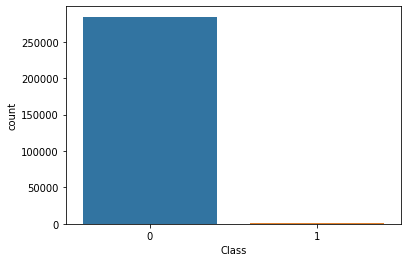

In [89]:
sns.countplot("Class",data=dataframe)

In [90]:
dataframe['Amount'].describe()
#Average Transactions are very small

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [91]:
RS=RobustScaler()
dataframe['Amount'] = RS.fit_transform(dataframe['Amount'].values.reshape(-1, 1))
dataframe['Time'] = RS.fit_transform(dataframe['Time'].values.reshape(-1, 1))
df = dataframe.sample(frac=1, random_state = 42)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,-0.507372,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,-0.474994,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,-0.578108,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,0.968421,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,0.984281,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0


In [92]:
fraud_df_train = df.loc[df['Class'] == 1][:int(492*0.8)]
fraud_df_test = df.loc[df['Class'] == 1][int(492*0.8):]

#undersampling of the data. Fraud represent 10% of base now
normal_df_train_sup= df.loc[df['Class'] == 0][:int(492*0.8*9*3)]
normal_df_test= df.loc[df['Class'] == 0][int(492*0.8)*9*3:int(492*0.8*9*3)+int(284800*0.2)]
new_df_train = pd.concat([pd.DataFrame(normal_df_train_sup), fraud_df_train])

#oversampling of the data. The number of Fraud was twiced
sm = SMOTE(k_neighbors=5, random_state=0, n_jobs=8, ratio={1:int(492*0.8*3), 0:int(492*0.8*9*3)})

normal_df_train_sup, fraud_df_train = sm.fit_resample(new_df_train.drop('Class', axis=1), new_df_train['Class'])
fraud_df_train = pd.DataFrame(fraud_df_train.transpose()).rename(columns={0:"Class"})
new_df_train = pd.concat([pd.DataFrame(normal_df_train_sup), fraud_df_train ], axis=1)
new_df_train.columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount','Class']
new_df_test = pd.concat([pd.DataFrame(normal_df_test), fraud_df_test])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [93]:
new_df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.474994,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
1,-0.578108,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
2,0.968421,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
3,0.984281,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0
4,-0.197535,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,-2.084080,0.480381,0.473738,-2.192276,0.773942,0.294484,0.406074,-0.541855,1.031450,0.017076,0.618411,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,1.089918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11802,0.680354,-0.184181,1.685175,-4.322818,0.490501,0.140317,-1.593469,-1.291782,0.320481,-2.146076,-3.222253,1.883835,-3.205923,0.345206,-5.544256,-0.647496,-3.216099,-2.918577,-0.325993,-0.164268,-0.069480,0.204094,-0.318858,-0.259182,0.212973,0.550747,0.768697,0.057238,0.118161,-0.086755,1
11803,-0.130665,1.141071,1.222207,-1.431386,2.037993,0.801037,-1.043832,0.316433,-0.035426,-0.003241,-2.034137,1.568878,-0.189541,-0.525091,-4.793271,-0.000442,1.080407,3.847979,1.608492,-0.815733,-0.047142,-0.366784,-0.792336,-0.151237,-0.218652,0.684706,-0.330060,0.091191,0.120060,-0.293440,1
11804,-0.215457,-0.799949,1.835968,-1.405289,2.959344,0.107967,-0.517854,-1.302079,0.628327,-1.574778,-2.667563,1.115828,-2.913272,-0.107036,-5.171714,-0.798303,-0.894580,-2.890339,-0.548367,-0.847189,0.133164,0.239684,-0.144949,-0.122350,-0.621051,0.361286,0.010162,0.188140,0.049252,-0.209897,1
11805,-0.769477,-15.519362,7.846109,-20.110063,11.366039,-7.524204,-2.197191,-15.385563,-0.242523,-6.927248,-13.857742,10.145287,-14.718967,0.469044,-14.406804,-0.348441,-8.225496,-12.419200,-4.849108,0.618352,1.077319,-2.417861,0.816053,0.079586,-0.999429,0.678680,0.771081,2.226668,-1.245121,-0.293440,1


Text(0.5, 1.0, 'Class Count - Test Data')

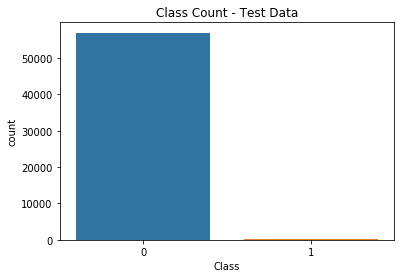

In [94]:
sns.countplot("Class",data=new_df_test).set_title('Class Count - Test Data')

Normal 90.01 % of the train dataset
Fraude 9.99 % of the train dataset


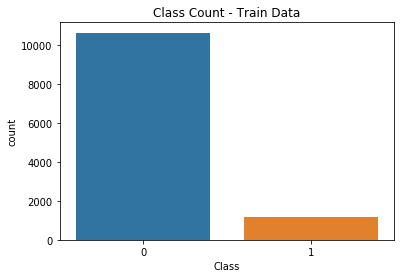

In [95]:
X_train_sup = new_df_train.drop('Class', axis=1)
y_train = new_df_train['Class']

X_test=new_df_test.drop('Class', axis=1)
y_test=new_df_test['Class']
new_df_train.head()

sns.countplot("Class",data=new_df_train).set_title('Class Count - Train Data')
print('Normal', round(
        pd.Series(y_train).value_counts()[0]/len(X_train_sup)*100, 2), '% of the train dataset')
print('Fraude', round(
        pd.Series(y_train).value_counts()[1]/len(X_train_sup)*100, 2), '% of the train dataset')

In [96]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model1.fit(X_train_sup, y_train)
y_train_hat = model1.predict(X_train_sup)
y_train_hat_probs = model1.predict_proba(X_train_sup)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

Confusion matrix:
 [[10603    24]
 [  162  1018]]
Training accuracy: 98.4247 %
Training AUC: 98.9074 %


In [97]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[56784   192]
 [   11    88]]
Training accuracy: 99.6443 %
Training AUC: 97.3961 %


In [98]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.999806  0.996630  0.998216     56976
           1   0.314286  0.888889  0.464380        99

    accuracy                       0.996443     57075
   macro avg   0.657046  0.942760  0.731298     57075
weighted avg   0.998617  0.996443  0.997290     57075

